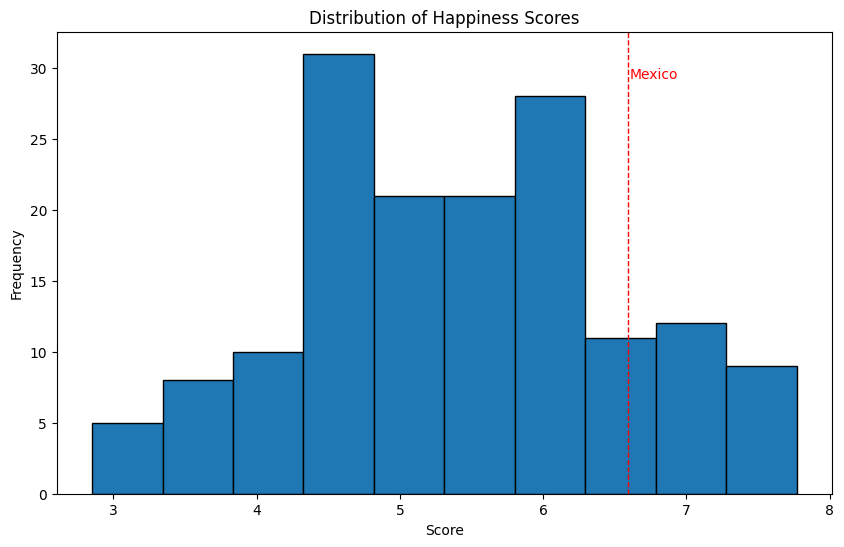

In [8]:
import pandas as pd
try:
    df = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
    happiness = df
    mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')

plt.figure(figsize=(10, 6))
plt.hist(happiness['Score'], bins=10, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')

mexico_score = mexico['Score'].iloc[0]
plt.axvline(mexico_score, color='red', linestyle='dashed', linewidth=1)
plt.text(mexico_score + 0.01, plt.gca().get_ylim()[1] * 0.9, 'Mexico', color='red')

plt.show()

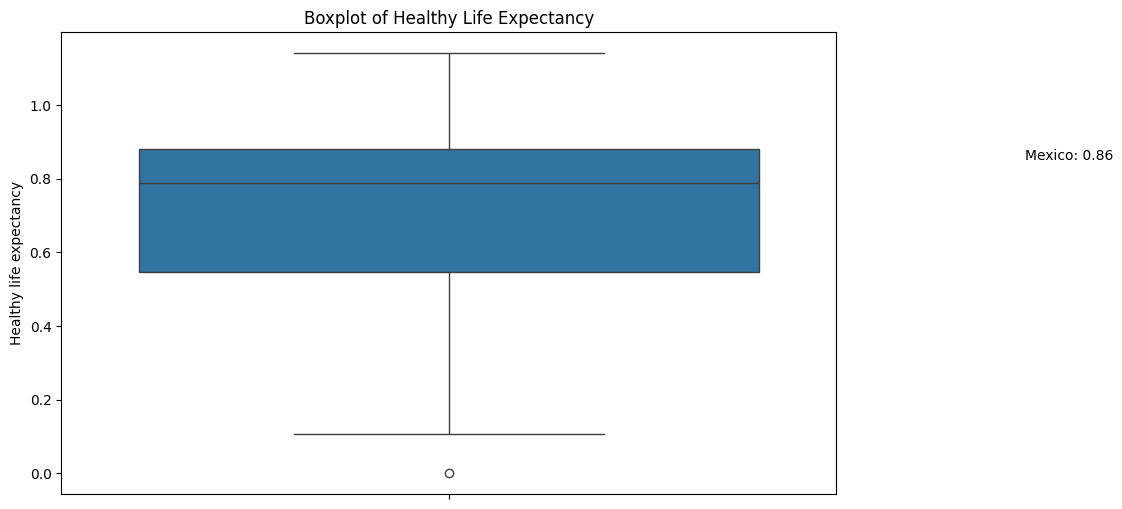

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y='Healthy life expectancy', data=happiness)
plt.title('Boxplot of Healthy Life Expectancy')
mexico_life_expectancy = mexico['Healthy life expectancy'].iloc[0]
plt.text(0.8, mexico_life_expectancy, f'Mexico: {mexico_life_expectancy:.2f}',
         horizontalalignment='center', verticalalignment='center')

plt.show()

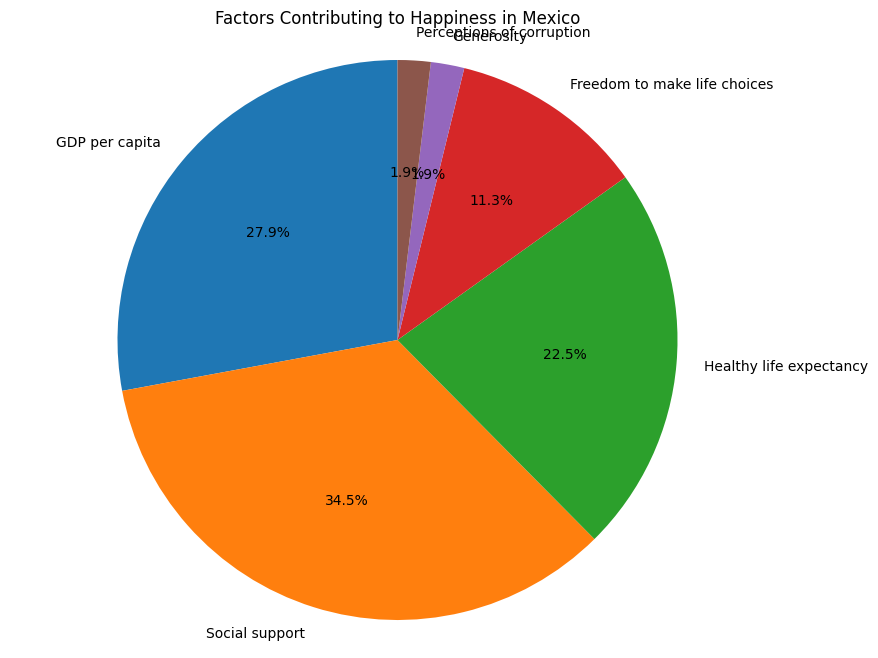

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
    happiness = df
    mexico = happiness[happiness['Country or region'] == 'Mexico']
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

factors = mexico[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                  'Generosity', 'Perceptions of corruption']].iloc[0]

plt.figure(figsize=(10, 8))
plt.pie(factors, labels=factors.index, autopct='%1.1f%%', startangle=90)
plt.title('Factors Contributing to Happiness in Mexico')
plt.axis('equal')
plt.show()

In [14]:
happiest_country = happiness.loc[happiness['Score'].idxmax()]

least_happy_country = happiness.loc[happiness['Score'].idxmin()]

healthiest_country = happiness.loc[happiness['Healthy life expectancy'].idxmax()]

most_generous_country = happiness.loc[happiness['Generosity'].idxmax()]

filtered_df = pd.concat([
    happiest_country.to_frame().T,
    least_happy_country.to_frame().T,
    healthiest_country.to_frame().T,
    most_generous_country.to_frame().T,
    mexico
])

filtered_df = filtered_df.reset_index(drop=True)

filtered_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393
1,156,South Sudan,2.853,0.306,0.575,0.295,0.01,0.202,0.091
2,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
3,131,Myanmar,4.36,0.71,1.181,0.555,0.525,0.566,0.172
4,23,Mexico,6.595,1.07,1.323,0.861,0.433,0.074,0.073


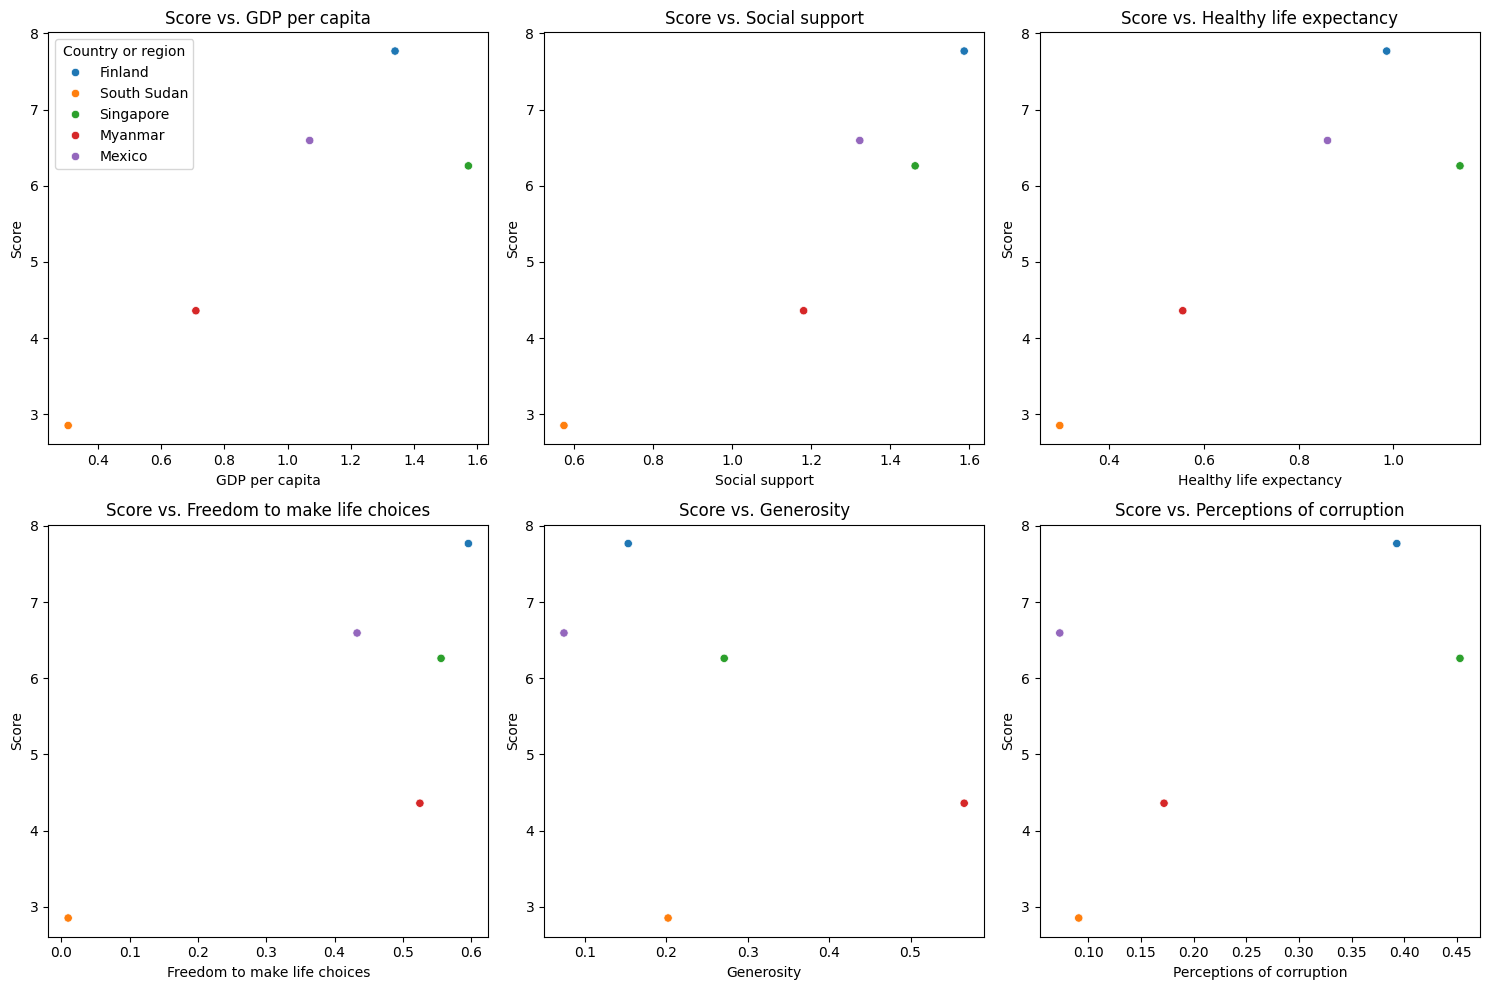

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
    happiness = df
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

happiest_country = happiness.loc[happiness['Score'].idxmax()]

least_happy_country = happiness.loc[happiness['Score'].idxmin()]

healthiest_country = happiness.loc[happiness['Healthy life expectancy'].idxmax()]

most_generous_country = happiness.loc[happiness['Generosity'].idxmax()]

mexico = happiness[happiness['Country or region'] == 'Mexico']

filtered_df = pd.concat([
    happiest_country.to_frame().T,
    least_happy_country.to_frame().T,
    healthiest_country.to_frame().T,
    most_generous_country.to_frame().T,
    mexico
])


filtered_df = filtered_df.reset_index(drop=True)

factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, factor in enumerate(factors):
    sns.scatterplot(x=factor, y='Score', data=filtered_df, ax=axes[i], hue='Country or region', legend=(i==0))  # legend only for first plot
    axes[i].set_title(f'Score vs. {factor}')
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

try:
    df = pd.read_csv('/content/0.9ep3krj7s1o0.ona2jvufk4mMetadata.csv')
    metadata = df

    df = df.rename(columns={"TableName": "Country"})
    print(df.head())
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")


  Country Code                     Region          IncomeGroup SpecialNotes  \
0          ABW  Latin America & Caribbean          High income          NaN   
1          AFG                 South Asia           Low income          NaN   
2          AGO         Sub-Saharan Africa  Lower middle income          NaN   
3          ALB      Europe & Central Asia  Upper middle income          NaN   
4          AND      Europe & Central Asia          High income          NaN   

       Country  
0        Aruba  
1  Afghanistan  
2       Angola  
3      Albania  
4      Andorra  


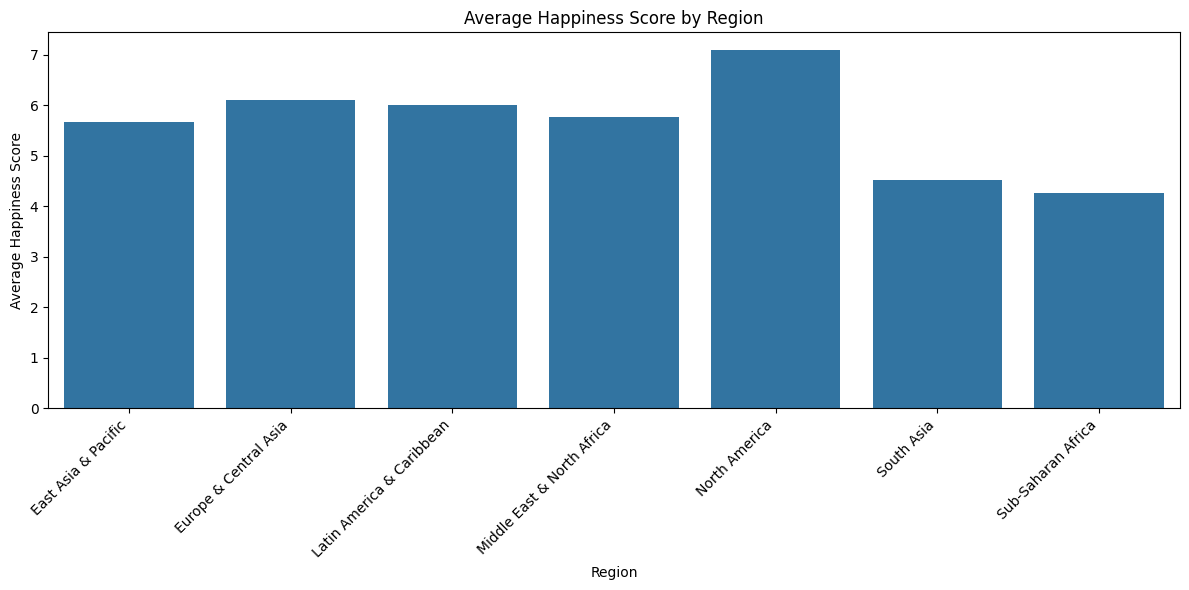

In [24]:
try:
    happiness_df = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
    metadata_df = pd.read_csv('/content/0.9ep3krj7s1o0.ona2jvufk4mMetadata.csv')
except FileNotFoundError:
    print("Error: One or both CSV files not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

metadata_df = metadata_df.rename(columns={"TableName": "Country or region"})

merged_df = pd.merge(happiness_df, metadata_df, on='Country or region', how='left')

average_happiness_by_region = merged_df.groupby('Region')['Score'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_happiness_by_region.index, y=average_happiness_by_region.values)
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score by Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()